### Linear Regression with Tensorflow

#### Erzeugen von Trainingsdaten

### Aufgaben

- Implementieren Sie in lineares Modell mit Tensorflow
 - Die Daten sollen durch den Feed-Mechanismus in den Graphen kommen. 
- Implementiern Sie eine Kostenfunktion (Quadrierte Abweichungen)
- Implementieren Sie das Gradientenabstiegsverfahren zur Minimierung der Kostenfunktion:
  - Verwenden Sie zur Berechnung des Gradienten `tf.gradients`. __Keine__ Verwendung von eingebauten Opmierungsalgorithmen, wie `tf.train.GradientDescentOptimizer`.
  - Optimieren Sie die Parameter aus Startwerten
  - Zeichnen Sie die gefundene Fit-Gerade zusammen mit den Daten
 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:

x_min = -10.
x_max = 10.
m = 10

x = np.random.uniform(x_min, x_max, m)
a = 10.
c = 5.
y_noise_sigma = 3.
y = a + c * x + np.random.randn(len(x)) * y_noise_sigma


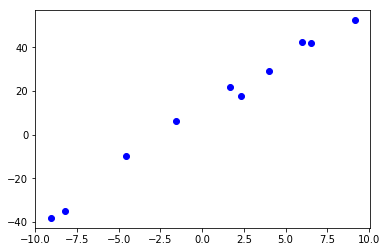

In [3]:
plt.plot(x, y, "bo")

In [23]:
import tensorflow as tf

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

init = tf.global_variables_initializer() # all variables need to be initialized like so
sess = tf.Session()
sess.run(init)

#print(sess.run(linear_model, {x:[1,2,3,4]}))

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

'''
feed_dict = {x:[1,2,3,4], y:[0,-1,-2,-3]}
for i in range(10):
    gradientLoss = tf.gradients(loss, [W, b])
    alphaGradientLosses = tf.multiply(0.01, gradientLoss)

    computational_graph_update_W = tf.subtract(W, alphaGradientLosses[0])
    computational_graph_update_b = tf.subtract(b, alphaGradientLosses[1])

    newW = sess.run(computational_graph_update_W, feed_dict)
    #print(newW)
    #print(sess.run(W))

    newb = sess.run(computational_graph_update_b, feed_dict)
    #print(newb)
    #print(sess.run(b))

    sess.run(tf.assign(W, newW))
    sess.run(tf.assign(b, newb))

    print(sess.run(W))
    print(sess.run(b))
    
'''
    
#print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))
#help(tf.gradients)

def MyGradientDescent(alpha):
    def MyGDOptimizer(LossFunction):
        gradientLosses = tf.gradients(LossFunction, [W, b])
        alphaGradientLosses = tf.multiply(alpha, gradientLosses)

        newW = tf.subtract(W, alphaGradientLosses[0])
        newb = tf.subtract(b, alphaGradientLosses[1])
        return [newW, newb]
        #tf.assign(W, newW)
        #tf.assign(b, newb)
    return MyGDOptimizer

optimizer = MyGradientDescent(0.01)
training = optimizer(loss)

for i in range(1000):
    newParameters = sess.run(training, {x:[1,2,3,4], y:[0,-1,-2,-3]})
    sess.run(tf.assign(W, newParameters[0]))
    sess.run(tf.assign(b, newParameters[1]))
    if i % 50 == 0:
        print(sess.run(W))
        print(sess.run(b))

print(sess.run([W, b]))


[-0.21999997]
[-0.456]
[-0.7127021]
[ 0.15530905]
[-0.84270465]
[ 0.53753263]
[-0.913881]
[ 0.74679965]
[-0.95284992]
[ 0.86137295]
[-0.97418535]
[ 0.92410177]
[-0.98586655]
[ 0.95844597]
[-0.99226201]
[ 0.97724938]
[-0.99576342]
[ 0.98754394]
[-0.99768049]
[ 0.99318033]
[-0.99873012]
[ 0.99626648]
[-0.99930471]
[ 0.99795592]
[-0.99961936]
[ 0.99888098]
[-0.99979162]
[ 0.99938732]
[-0.99988592]
[ 0.9996646]
[-0.99993753]
[ 0.99981636]
[-0.99996579]
[ 0.99989945]
[-0.99998122]
[ 0.99994481]
[-0.99998969]
[ 0.99996972]
[-0.9999944]
[ 0.99998343]
[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


In [4]:
t = tf.Variable([[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]])
print(sess.run(tf.shape(t)))
print(sess.run(tf.rank(t)))

NameError: name 'tf' is not defined